# 1.1 Aquisição e leitura de dados
Utilizaremos dados do DataSUS, disponíveis pelo Tabnet.

In [125]:
import pandas as pd

In [126]:
url = "../dados/nomes-atendimento-UF.csv"
df_atendimento = pd.read_csv(url, encoding="ISO-8859-1",sep=";",skiprows=3,skipfooter=12, thousands=".", decimal=",")

D:\Temp\ipykernel_43952\3917277595.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df_atendimento = pd.read_csv(url, encoding="ISO-8859-1",sep=";",skiprows=3,skipfooter=12, thousands=".", decimal=",")


In [127]:
df_atendimento.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2024/Mai,2024/Jun,2024/Jul,2024/Ago,2024/Set,2024/Out,2024/Nov,2024/Dez,2025/Jan,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,14245430.08,13513718.18,15768573.38,14703987.50,14150716.10,13560840.74,9139104.31,6519383.53,2758684.28,1560284917.23
1,12 Acre,-,-,-,-,-,-,-,-,-,...,4988565.96,5264769.94,5030037.73,5142268.22,4684727.01,4602457.27,3925559.35,1415201.09,-,646620087.26
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,23374512.69,22127422.45,23608720.40,24321472.24,23723027.50,23091729.84,18975268.18,15476800.24,6664235.65,2888132298.30
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,3366624.22,3363751.20,3329894.41,2951150.34,2368791.93,1054670.97,787381.40,6307.79,-,489970130.16
4,15 Pará,-,-,-,-,-,-,-,-,-,...,56654098.57,52473874.98,55425739.44,53526292.16,57356780.09,58202601.03,47314110.27,35595477.64,14861885.10,6983761195.26


In [128]:
df_atendimento.mean(numeric_only=True)

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2024/Set     75209576.23
2024/Out     75604913.79
2024/Nov     62585781.04
2024/Dez     50022867.39
Total      9460731715.38
Length: 210, dtype: float64

In [129]:
df_atendimento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 333 entries, Unidade da Federação to Total
dtypes: float64(210), object(123)
memory usage: 70.4+ KB


Reformatando a saída de números para uma melhor compreensão

In [130]:
pd.options.display.float_format = '{:.2f}'.format

In [131]:
df_atendimento.mean(numeric_only=True)

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2024/Set     75209576.23
2024/Out     75604913.79
2024/Nov     62585781.04
2024/Dez     50022867.39
Total      9460731715.38
Length: 210, dtype: float64

## Desafio
Mostre apenas a coluna mais recente.

In [132]:
df_atendimento.iloc[:,-2]

0       2758684.28
1                -
2       6664235.65
3                -
4      14861885.10
5       1870008.23
6       2558853.91
7      14167784.17
8       8661345.49
9      20466478.61
10     10695236.55
11     22181612.79
12     53183496.03
13      5867825.94
14      2897390.57
15     35121217.44
16     97869146.78
17     18367566.70
18     37940675.61
19    210480831.49
20     69078550.67
21     41423167.08
22     35442563.64
23      3611400.51
24      8479123.04
25     25809563.12
26     16764896.04
Name: 2025/Jan, dtype: object

# 1.2 Primeiras visualizações de dados

In [133]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

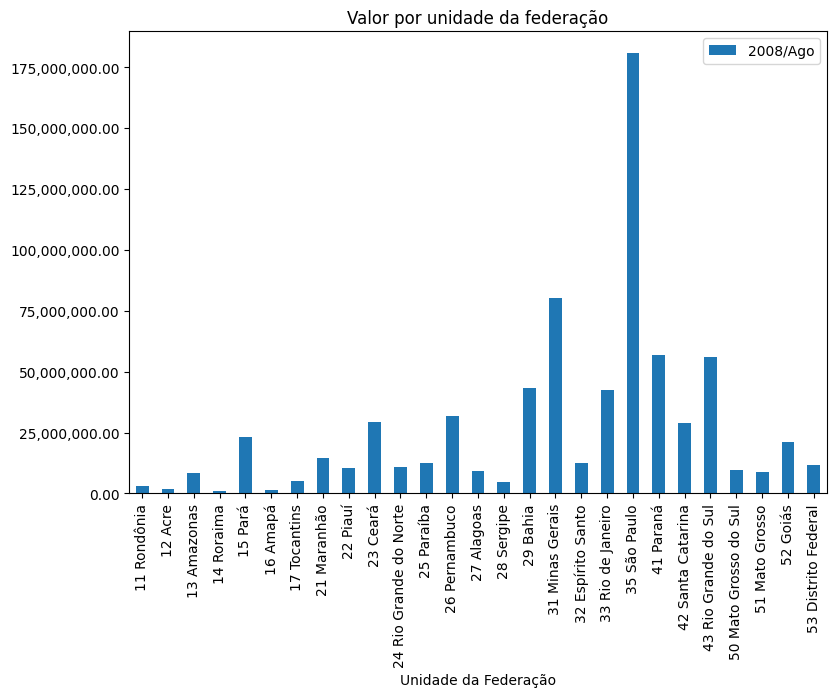

In [135]:
axis = df_atendimento.plot(x="Unidade da Federação", y="2008/Ago", kind="bar", figsize=(9,6))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Valor por unidade da federação")
plt.show()


## Desafios
### 1. Deixar as legendas anguladas para facilitar a leitura
### 2. Fazer um gráfico como o acima para o mês mais recente.

Completaremos os dois abaixo.

In [ ]:
coluna_recente = df_atendimento.columns[-2]
coluna_recente

'2025/Jan'

In [143]:
import numpy as np

In [149]:
df_atendimento[coluna_recente] = df_atendimento[coluna_recente].replace('-', np.nan).astype(float)
df_atendimento[coluna_recente]

0      2758684.28
1             NaN
2      6664235.65
3             NaN
4     14861885.10
5      1870008.23
6      2558853.91
7     14167784.17
8      8661345.49
9     20466478.61
10    10695236.55
11    22181612.79
12    53183496.03
13     5867825.94
14     2897390.57
15    35121217.44
16    97869146.78
17    18367566.70
18    37940675.61
19   210480831.49
20    69078550.67
21    41423167.08
22    35442563.64
23     3611400.51
24     8479123.04
25    25809563.12
26    16764896.04
Name: 2025/Jan, dtype: float64

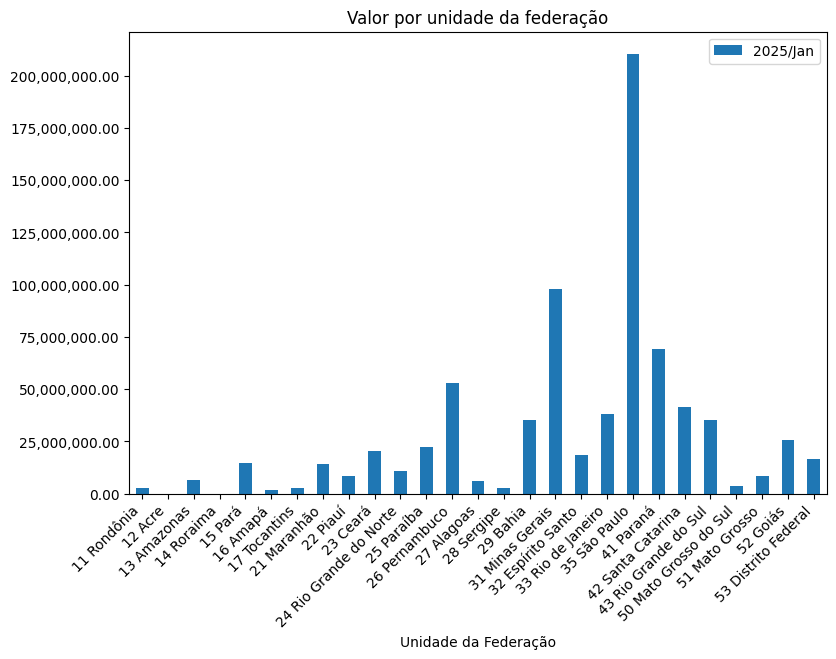

In [162]:
axis = df_atendimento.plot(x="Unidade da Federação", y=coluna_recente, kind="bar", figsize=(9,6))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.xticks(rotation=45, ha='right')

plt.title("Valor por unidade da federação")
plt.show()